# **Sequence to Sequence Learning with Neural Networks**

## **background**
### **1. RNN(Recurrent Neural Network)**
- sequence data(텍스트 데이터, 시계열 데이터) 처리에 적합한 모델
- hidden layer(은닉층)에서 나온 결과값이 다시 해당 layer로 돌아가 새로운 입력값과 연산을 수행하는 순환 구조를 이루는 인공신경망의 한 종류
- **sequence의 길이에 관계없이 input, output을 받아들일 수 있는** 신경망 구조
- **hidden state($h_t$)**: 해당 시점 $t$까지의 단어 정보
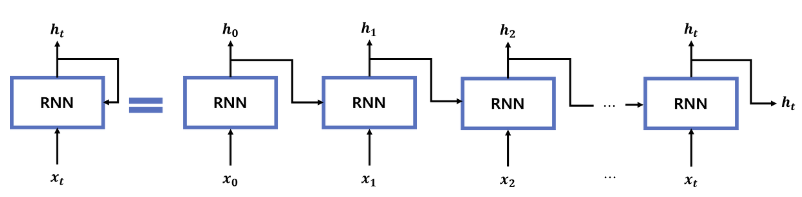  
[그림1] RNN의 순환구조
#### **RNN의 수식**
$h_t = tanh(W_xx_t + W_hh_{t-1}+ b_h)$  
$y_t = f(W_yh_t + b_y)$    (f는 비선형 활성화 함수 중 하나)

**RNN의 연산을 벡터와 행렬 연산으로 이해해보자**  
$x_t$: 입력 벡터(ex: 단어벡터)  
$d$: 입력 벡터의 차원  
$D_h$: hidden state의 크기  
![RNN 연산](https://wikidocs.net/images/page/22886/rnn_images4-5.PNG)  
hidden state가 $D_h$차원의 벡터라는 것을 기억해두자!   

**Q. hidden state의 크기 $D_h$는 어떻게 결정되는가?**
- $D_h$는 RNN의 성능과 효율성에 영향을 미치는 hyperparameter임.
- 최적의 $D_h$값을 찾기 위해 하이퍼파라미터 튜닝 과정이 필요함.

#### **RNN의 학습 과정**
- *초기 hidden state: 보통 영벡터(zero vector)로 초기화함*
- *입력 시퀀스는 embedding layer를 거처서 embedding vector로 변환됨*
- *softmax 활성화 함수를 거쳐서 나온 값 중 큰 값에 해당하는 것과 실제 target의 차이를 손실함수로 하여 학습을 진행함*
<img src="https://velog.velcdn.com/images%2Fhhhong%2Fpost%2Fa68fff4c-d18a-46f6-acfa-69b4d0ee9f6a%2FScreen%20Shot%202022-01-19%20at%203.39.48%20PM.png" width="600" height="600"/>

[그림2] RNN의 품사 구별 예시

### **2. LSTM**
- RNN의 **장기 의존성 문제**(처음에 분석한 정보들을 나중까지 유지하기 매우 어려움) 해결
- RNN 구조 + **cell state(셀 상태), input/forget/output gate** 도입
- LSTM은 긴 시퀀스에서도 효과적으로 정보를 학습하고 처리할 수 있음.

<img src="https://velog.velcdn.com/images/soup1997/post/d8e2cbf1-319d-4d65-aa11-4892381354e6/image.png" width="500" height="500"/>

- **cell state($c_t$)**
    - LSTM의 핵심 메모리 역할, 핵심 정보 흐름
    - 셀 상태는 이전 셀 상태 $c_{t-1}$로부터 일부 정보를 유지하고, 새로운 정보와 결합하여 현재 셀 상태 $c_t$로 업데이트 됨

**게이트(gate)**: LSTM은 각 timestep에서 input, forget, output gate를 사용하여 정보를 제어함.
- **망각 게이트(forget gate, $f_t$)**: 이전 셀 상태 $c_{t-1}$에서 어떤 정보를 버릴지 결정  
  $c_t = f_t⋅c_{t-1}$
- **입력 게이트(input gate, $i_t$)**: 현재 입력 $x_t$와 이전 hidden state $h_{t-1}$를 사용하여 새로운 정보($\tilde{c}_t$)를 셀 상태에 얼마나 반영할지 결정  
  $c_t = f_t⋅c_{t-1} + i_t⋅\tilde{c}_t$
- **출력 게이트(output gate, $o_t$)**: 현재 셀 상태 $c_t$의 어느 부분을 출력으로 보낼지 결정
  $h_t = o_t⋅tanh(c_t)$

### **3. GRU**
- LSTM 구조 단순화, LSTM 간소화시킨 버전
#### **GRU의 특징**
- LSTM의 cell state가 없음. 대신 hidden state가 cell state의 역할까지 맡음.
- LSTM의 forget/input gate가 **update gate**라는 하나의 gate로 결합됨.
- LSTM의 output gate가 없음. 대신 비슷한 역할을 하는 **reset gate**가 추가됨.

---

## **Paper Review**

### **1. 배경: Seq2Seq가 왜 필요한가?**

#### **DNNs의 장점**
- 복잡하고 어려운 문제(음성 인식, 시각 객체 인식)에서 성능 뛰어남.
- 임의의 병렬 계산을 적은 수의 단계로 수행 -> 복잡한 계산을 효율적으로 처리
- 복잡한 계산을 학습함.
- (라벨링된 train data set이 충분히 있다면) 지도 학습의 역전파(backpropagation) 알고리즘을 통해 효과적으로 훈련 가능
- 사람이 문제를 빠르게 해결할 수 있는 경우, DNNs도 적절한 매개변수 설정을 통해 동일한 문제를 해결할 수 있음. -> why? 인간의 학습 방식을 모방하여 문제 해결
#### **DNNs의 한계**
**입력과 출력(data)의 차원이 알려져 있고, 고정되어 있어야 함.**
- 데이터(input/target data)가 **고정된 차원의 벡터로 표현(encoding)될 수 있는 경우(문제)에만** 잘 작동함.
    - image data: (이미지 분류 문제에서) 이미지가 고정된 크기의 픽셀 벡터로 표현됨, 라벨도 고정된 차원의 벡터로 표현됨.
- **sequence data의 가변성**
    - 음성 인식, 기계 번역, 질문 응답 등 중요한 문제(sequence data 처리 문제)들은 sequence data를 다룸
        - 음성 인식: 음성 신호가 시간에 따라 변화함
        - 기계 번역: 문장의 길이가 다를 수 있음
        - 질문 응답: 질문과 답변의 길이가 다를 수 있음
    - **sequence data의 길이가 가변적임** -> 고정된 차원의 벡터로 쉽게 표현 불가능(처리 불가능) ex) 문장마다 구성되는 단어의 개수가 다름
 
**solution: sequence를 sequence로 mapping하자! (seq2seq)**

### **2. model 설계 과정: Seq2Seq가 되기까지**

#### **1) RNN**
FFN(feedforward neural networks, 피드포워드 신경망)을 시퀀스에 자연스럽게 일반화한 것
- 입력 시퀀스$(x_1,...,x_T)$가 주어졌을 때 다음 반복식을 통해 출력 시퀀스$(y_1,...,y_T)$를 계산함.  
    $h_t = sigmoid(W_{hx}x_t + W_{hh}h_{t-1})$  
    $y_t = W_{yh}h_t$  
    *일반적으로 RNN의 hidden state 구할 때 tanh 활성화 함수를 사용함*
- **RNN의 한계**: **입력 시퀀스와 출력 시퀀스의 길이가 다른 경우**에 적합하지 않음.
> **입력 시퀀스와 출력 시퀀스의 길이가 같은 경우**: 기존의 RNN 사용하면 됨.   
> **입력 시퀀스와 출력 시퀀스의 길이가 다른 경우**: 인코더-디코더 구조 사용 ex) Seq2Seq
#### **2) RNN 기반 encoder-decoder 구조**
일반 시퀀스 학습을 위한 가장 단순한 전략: 입력 시퀀스와 출력 시퀀스의 길이가 다른 경우, 인코더-디코더 구조를 사용하자!
- encoder RNN: 입력 시퀀스를 고정된 크기의 벡터로 mapping
- decoder RNN: encoder에서 만든 벡터를 출력 시퀀스로 mapping
  
**RNN 기반 encoder-decoder 구조의 한계**: 일반적인 RNN은 긴 시퀀스에서 기울기 소실(vanishing gradient) 문제 등으로 인해 **장기 의존성 문제**를 겪어 훈련이 어려움
#### **3) LSTM 기반 encoder-decoder 구조**
LSTM의 목표: 아래 조건부 확률(입력 시퀀스가 주어졌을 때 출력 시퀀스가 생성될 확률)을 추정하는 것

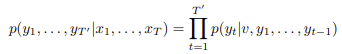
- $v$: encoder LSTM의 마지막 hidden state, 입력 시퀀스의 고정된 차원의 벡터 표현
- $T'$는 $T$와 다를 수 있음
#### **4) 논문에서의 실제 모델**
LSTM 기반 encoder-decoder 구조에서 세 가지가 다름.  
1. **2개의 LSTM 사용**
   - 입력 시퀀스를 위한 LSTM, 출력 시퀀스를 위한 LSTM을 각각 사용
   - 학습할 매개변수의 수는 2배로 증가함 but 병렬화로 여러 GPU에서 효율적으로 학습 가능
2. **다층 LSTM**
   - 심층 LSTM(깊은 LSTM)을 사용하여 단일 언어 쌍에서 성능 뛰어남.
3. **소스 단어 순서 뒤집기(역순 처리)**
   - SGD가 긴 문장에서의 성능을 향상시킬 수 있음.

### **3. 새로운 방법론 소개: Seq2Seq란?**

#### **Seq2Seq model의 idea**
- **LSTM을 사용**하여 DNNs의 한계(DNNs는 입력과 출력이 고정된 차원의 벡터로 표현될 때 잘 작동하지만, 시퀀스 데이터는 길이가 가변적임)를 극복하자!
- Seq2Seq model: **입력 시퀀스를 고정된 차원의 벡터로 변환하고, 이를 기반으로 출력 시퀀스 생성**

#### **Seq2Seq model의 구조**
**encoder**와 **decoder**로 구성됨

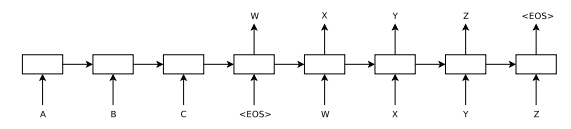  
[그림1] 논문에서 제시한 seq2seq model의 작동방식

![이해를 위한 그림](https://wikidocs.net/images/page/24996/%EC%9D%B8%EC%BD%94%EB%8D%94%EB%94%94%EC%BD%94%EB%8D%94%EB%AA%A8%EB%8D%B8.PNG)  
[그림2] 이해를 위한 seq2seq model의 구조

- <span style="background-color:#fff5b1">**encoder LSTM**</span>: 1st LSTM으로, input sequence를 한 번에 하나의 타임스텝씩 읽어들여 고정된 차원의 벡터 표현으로 encoding함.
    - **input sequence 처리**
        - <span style="background-color:#FFE6E6">encoder LSTM는 input sequence를 역순으로 처리함(**역순 처리**)</span> -> data에 많은 단기 의존성을 도입하여 최적화 문제를 더 쉽게 만듦.  
          ex) 원래 순서는 A, B, C임. but 실제로는 C, B, A와 같이 역순으로 처리됨.
        - 각 timestep에서 입력값과 이전 timestep의 hidden state를 사용 -> 현재 timestep의 hidden state 계산
    - **마지막 시점의 hidden state**
        - input sequence의 전체를 요약한 고정된 차원의 벡터 표현
        - decoder LSTM의 초기 hidden state로 전달됨 -> decoder가 output sequence 생성하는데 필요한 정보 제공함
- <span style="background-color:#fff5b1">**decoder LSTM**</span>: 2nd LSTM으로, encoder의 마지막 hidden state(최종 hidden state)를 초기 hidden state로 사용하여 output sequence 생성
    - **output sequence 생성**: 각 타임스텝에서 이전 타임스텝의 출력을 입력으로 받아 새로운 출력을 생성
        - 초기 hidden state를 기반으로 첫 번째 출력 값을 생성하고, 이를 다음 입력으로 사용하여 시퀀스의 다음 값을 생성 => EOS 토큰을 만날 때까지 반복

### **4. Result**

#### **큰 심층 LSTM의 성과**
- 제한된 어휘를 가지고도 비교적 최적화되지 않은 간단한 접근 방식이 표준 SMT 기반 시스템을 대규모 기계 번역(MT) 작업에서 능가함. (아래 점수는 BLEU 점수임)
|큰 심층 LSTM|표준 SMT 기반 시스템|
|---|---|
|제한된 어휘|어휘 무제한|
|34.81|33.30|
- 충분한 학습 데이터가 있다면 다른 시퀀스 학습 문제에서도 효과적으로 작동할 가능성을 시사함.

#### **소스 문장 역순 처리**
- 소스 문장의 단어를 역순으로 처리하면 성능이 크게 개선됨.
- 단기 의존성이 많은 문제 인코딩을 찾는 것이 중요함.

#### **긴 문장 번역 능력**
- LSTM이 긴 문장을 올바르게 번역할 수 있음에 놀람.
- 초기에는 메모리 한계로 인해 긴 문장에서 실패할 것이라 생각했으나, 역순 데이터셋으로 훈련된 LSTM은 긴 문장에서도 잘 작동함.

---

## **Summary**

#### **논문의 흐름**
1. DNNs는 입력과 출력이 고정된 차원의 벡터로 표현될 수 있는 문제에만 적합함.
2. 그러나 시퀀스 데이터는 길이가 가변적이기 때문에 시퀀스 데이터 처리 문제에서는 DNNs를 사용할 수 없음. 시퀀스 데이터를 처리할 방법이 필요함.
3. 그래서 LSTM을 사용함. LSTM은 입력의 길이에 상관없이 입력 시퀀스를 고정된 차원의 벡터(마지막 시점에서의 hidden state)로 표현할 수 있음.
4. 이 논문에서 집중하는 시퀀스 데이터 처리 문제는 주로 기계 번역이며, 이 문제는 시퀀스를 시퀀스로 매핑해야 하는 문제임.
5. 이 문제(기계 번역)를 해결하기 위해 LSTM 2개를 각각 인코더와 디코더로 사용하여 입력 시퀀스를 고정된 차원의 벡터로 표현하고, 이를 사용해 출력 시퀀스를 생성함. 이것이 Seq2Seq 모델임.
6. 이 논문에서 제안된 Seq2Seq 모델의 중요한 특성 중 하나는 입력 시퀀스를 역순으로 처리한다는 점임. 이는 모델의 최적화를 용이하게 하고 성능을 향상시킴.

#### **Seq2Seq model**  
LSTM과 같은 RNN을 기반으로 하여 입력 시퀀스를 고정된 차원의 벡터로 인코딩하고, 이를 다시 시퀀스로 디코딩하는 모델

#### **Seq2Seq model의 구성 요소**
1. **encoder**: input sequence 사용 -> 고정된 차원의 벡터 표현 생성
2. **decoder**: encoding된 벡터 사용 -> output sequence 생성

#### **Seq2Seq model의 주요 특성**
1. **가변 길이 sequence 처리**
   - encoder LSTM을 통해 가변 길이의 input sequence를 고정된 차원의 벡터로 변환
2. **장기 의존성 처리**
   - Seq2Seq 모델은 LSTM을 기반으로 함.
   - LSTM의 게이트 메커니즘을 통해 장기 의존성 문제를 효과적으로 처리함.
   - 즉, LSTM 도입에 의한 효과임.
3. **input sequence 역순 처리**
   - 단기 의존성을 증가시켜 최적화를 용이하게 함.
   - 긴 문장에서 성능을 향상시킴.  
     -> **why?** 긴 문장에서 중요한 정보는 시퀀스의 초반부에 위치하는 경우가 많음. 그러므로 역순 처리를 하면 초반부에 위치한 중요한 정보가 인코더의 마지막 부분에서 처리되고, 디코더의 초기 상태에 더 가까워져 디코더가 이를 더 잘 활용할 수 있음.
4. **의미 표현 학습**
   - 의역(paraphrasing)에 집중함. (문장의 형태보다는 **의미**)  
     -> 번역 작업에서 원문과 번역문은 유사한 의미를 가지고 있지만, 단어와 구문의 구조는 다를 수 있음.
   - decoder LSTM이 encoder가 생성한 벡터 표현을 기반으로 입력 문장의 의미를 잘 포착하고, 이를 기반으로 비슷한 의미를 가진 번역문을 생성하도록 학습함.
   - 능동태와 수동태와 같은 문법적 변형에도 불구하고 입력 문장의 의미를 일관되게 유지할 수 있음.(능동태와 수동태에 비교적 불변)